## <center><font size="5" class="serif" color="teal"> FIFA 20 - Clubs & Countries (Analysis & Visualization) </font> </center>

## TABLE OF CONTENT

* [Real Madrid](#2.1)
* [Juventus](#2.2)
* [Barcelona](#2.3)
* [PSG](#2.4)
* [Liverpool](#2.5)
______________________________________________________
* [England](#3.1)
* [Spain](#3.2)
* [Brazil](#3.3)
* [Germany](#3.4)
* [France](#3.5)

List of Input files

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="1"> </a>
# Data Processing

Libraries required

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [ ]:
df = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_20.csv')
r,c =df.shape
print("Number of Rows in the dataset: ",r)
print("Number of Cols in the dataset: ",c)

Uncleaned Data

In [ ]:
df.head()

Looking for null values in each column

In [ ]:
df.isnull().sum()

Getting basic Statistical Overview of the Dataset

In [ ]:
df.describe()

Dropping Columns which are unnecessary

In [ ]:
df.drop(['sofifa_id','player_url','real_face','nation_position','nation_jersey_number','long_name'],axis=1,inplace=True)

In [ ]:
df.head(10)

In [ ]:
df.columns

Defining a function which returns all the players' data of the Particular club. We are selecting only relevant attributes of players such as Name, Position, Age, Overall, Nationality, Value, Wage e.t.c .

In [ ]:
def club(x):
    return df[df['club']==x][['short_name', 'team_jersey_number','player_positions','overall','potential','nationality','age','value_eur','wage_eur','contract_valid_until']]

### TOP 5 CLUBS

<a id="2.1"> </a>
# Real Madrid

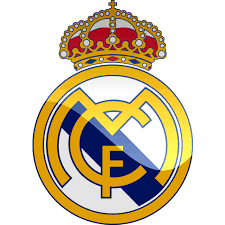

In [ ]:
realmadrid = club('Real Madrid')
realmadrid = realmadrid.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [ ]:
realmadrid.head()

In [ ]:
r,c = realmadrid.shape
print('Current Squad Strength of Real Madrid is ', r, ' Players')

In [ ]:
realmadridsquadvalue = 0
for i in range(0, len(realmadrid)):
    realmadridsquadvalue+=realmadrid.iloc[i]['value_eur']
    
realmadridsquadvalue = realmadridsquadvalue/1000000

print('Current Squad Value of Real Madrid is ',realmadridsquadvalue, ' Millions Euro')

In [ ]:
realmadridsquadwage = 0
for i in range(0, len(realmadrid)):
    realmadridsquadwage+=realmadrid.iloc[i]['wage_eur']
    
realmadridsquadwage = realmadridsquadwage/1000000

print('Real Madrid Spends ',realmadridsquadwage,' Millions Euros Per week as Wages to its Players')

In [ ]:
avg_age = realmadrid["age"].mean()
avg_age = round(avg_age,1)
print('Real Madrid Squad\'s have an average age of ',avg_age, ' Years')

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
avg_ovr = realmadrid["overall"].mean()
avg_ovr = int(avg_ovr)
print('Real Madrid Squad\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=realmadrid, palette='bright')
ax.set_title(label='Count of Real Madrid\'s Players on Basis of Positions', fontsize=18)

ax.set_xlabel(xlabel='Positions', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [ ]:
tempdf = realmadrid.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR of Real Madrid\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)

In [ ]:
tempdf = realmadrid.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potential of Real Madrid\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" Potential")

py.iplot(fig)

In [ ]:
tempdf = realmadrid.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Weekly wages of Real Madrid\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = realmadrid.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='value_eur', color='value_eur')

fig.update_layout(title='Values of Real Madrid\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Value in Euro")

py.iplot(fig)

In [ ]:
tempdf = realmadrid.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Contract of Real Madrid\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Contract Expiration")

py.iplot(fig)

<a id="2.2"> </a>
# Juventus

<img src='https://i.imgur.com/XiUGXBE.png'>

In [ ]:
juventus = club('Juventus')
juventus = juventus.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [ ]:
juventus.head()

In [ ]:
r,c = juventus.shape
print('Current Squad Strength of Juventus is ', r)

In [ ]:
juventussquadvalue = 0
for i in range(0, len(juventus)):
    juventussquadvalue+=juventus.iloc[i]['value_eur']
    
juventussquadvalue = juventussquadvalue/1000000

print('Current Squad Value of Juventus is ',juventussquadvalue, ' Millions Euro')


In [ ]:
juventussquadwage = 0
for i in range(0, len(juventus)):
    juventussquadwage+=juventus.iloc[i]['wage_eur']
    
juventussquadwage = juventussquadwage/1000000

print('Juventus Spends ',juventussquadwage,' Millions Euros Per week as Wages to its Players')

In [ ]:
avg_age = juventus["age"].mean()
avg_age = round(avg_age,1)
print('Juventus Squad\'s have an average age of ',avg_age, ' Years')

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
avg_ovr = juventus["overall"].mean()
avg_ovr = int(avg_ovr)
print('Juventus Squad\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=juventus, palette='bright')
ax.set_title(label='Count of Juvetus\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=juventus, palette='bright')
ax.set_title(label='Count of Juventus\'s Players on Basis of Positions', fontsize=18)

ax.set_xlabel(xlabel='Positions', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [ ]:
tempdf = juventus.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR of Juventus\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)

In [ ]:
tempdf = juventus.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potential of Juventus\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" potential")

py.iplot(fig)

In [ ]:
tempdf = juventus.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Weekly wages of Juventus\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = juventus.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='value_eur', color='value_eur')

fig.update_layout(title='Value of Juventus\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Value in Euro")

py.iplot(fig)

In [ ]:
tempdf = juventus.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Contract of Juventus\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Contract Expiration")

py.iplot(fig)

<a id="2.3"> </a>
# Barcelona

<img src='https://4.bp.blogspot.com/-i3SfVGZaK90/WMth_gLI10I/AAAAAAAAAj8/ud_KvFceSpETgxAeKpC8BcFoVyUdzL8HACLcB/s1600/Escudo_Barcelona.png'>

In [ ]:
barcelona = club('FC Barcelona')
barcelona = barcelona.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [ ]:
barcelona.head()

In [ ]:
r,c = barcelona.shape
print('Current Squad Strength of FC Barcelona is ', r)

In [ ]:
barcelonasquadvalue = 0
for i in range(0, len(barcelona)):
    barcelonasquadvalue+=barcelona.iloc[i]['value_eur']
    
barcelonasquadvalue = barcelonasquadvalue/1000000

print('Current Squad Value of Barcelona is ',barcelonasquadvalue, ' Millions Euro')


In [ ]:
barcelonasquadwage = 0
for i in range(0, len(barcelona)):
    barcelonasquadwage+=barcelona.iloc[i]['wage_eur']
    
barcelonasquadwage = barcelonasquadwage/1000000

print('Barcelona Spends ',barcelonasquadwage,' Millions Euros Per week as Wages to its Players')

In [ ]:
avg_age = barcelona["age"].mean()
avg_age = round(avg_age,1)
print('FC Barcelona Squad\'s have an average age of ',avg_age, ' Years')

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=barcelona, palette='bright')
ax.set_title(label='Count of Barcelona\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=barcelona, palette='bright')
ax.set_title(label='Count of Barcelona\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=barcelona, palette='bright')
ax.set_title(label='Count of Barcelona\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=barcelona, palette='bright')
ax.set_title(label='Count of Barcelona\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=barcelona, palette='bright')
ax.set_title(label='Count of Barcelona\'s Players on Basis of Positions', fontsize=18)

ax.set_xlabel(xlabel='Positions', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [ ]:
tempdf = barcelona.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR of Barcelona\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)

In [ ]:
tempdf = barcelona.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[60, 100], dtick=5, autorange=False)

fig.update_layout(title='Potential of Barcelona\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" potential")

py.iplot(fig)

In [ ]:
tempdf = barcelona.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Weekly wages of Barcelona\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = barcelona.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Values of Barcelona\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = barcelona.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Contract of Barcelona\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Contract Expiration")

py.iplot(fig)

<a id="2.4"> </a>
# PSG

<img src='https://i.imgur.com/vNHtbSz.png'>

In [ ]:
psg = club('Paris Saint-Germain')
psg = psg.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [ ]:
psg.head()

In [ ]:
r,c = psg.shape
print('Current Squad Strength of PSG is ', r)

In [ ]:
psgsquadvalue = 0
for i in range(0, len(psg)):
    psgsquadvalue+=psg.iloc[i]['value_eur']
    
psgsquadvalue = psgsquadvalue/1000000

print('Current Squad Value of PSG is ',psgsquadvalue, ' Millions Euro')

In [ ]:
psgsquadwage = 0
for i in range(0, len(psg)):
    psgsquadwage+=psg.iloc[i]['wage_eur']
    
psgsquadwage = psgsquadwage/1000000

print('PSG Spends ',psgsquadwage,' Millions Euros Per week as Wages to its Players')

In [ ]:
avg_age = psg["age"].mean()
avg_age = round(avg_age,1)
print('PSG Squad\'s have an average age of ',avg_age, ' Years')

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=psg, palette='bright')
ax.set_title(label='Count of PSG\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
avg_ovr = psg["overall"].mean()
avg_ovr = int(avg_ovr)
print('PSG Squad\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=psg, palette='bright')
ax.set_title(label='Count of PSG\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=psg, palette='bright')
ax.set_title(label='Count of PSG\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=psg, palette='bright')
ax.set_title(label='Count of PSG\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='player_positions', data=psg, palette='bright')
ax.set_title(label='Count of PSG\'s Players on Basis of Positions', fontsize=18)

ax.set_xlabel(xlabel='Positions', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=60, fontsize=12)

plt.show()

In [ ]:
tempdf = psg.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)

fig.update_layout(title='OVR of PSG\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)

In [ ]:
tempdf = psg.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)

fig.update_layout(title='Potential of PSG\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" potential")

py.iplot(fig)

In [ ]:
tempdf = psg.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Weekly wages of PSG\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = psg.sort_values(by='value_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Values of PSG\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = psg.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Contract of PSG\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Contract Expiration")

py.iplot(fig)

<a id="2.5"> </a>
# Liverpool

<img src='https://clipartart.com/images/liverpool-logo-clipart-512x512.png'>

In [ ]:
liverpool = club('Liverpool')
liverpool = liverpool.astype({'team_jersey_number':int, 'contract_valid_until':int})

In [ ]:
liverpool.head()

In [ ]:
r,c = liverpool.shape

print('Current Squad Strength of Liverpool is ', r)

In [ ]:
liverpoolsquadvalue = 0
for i in range(0, len(liverpool)):
    liverpoolsquadvalue+=liverpool.iloc[i]['value_eur']
    
liverpoolsquadvalue = liverpoolsquadvalue/1000000

print('Current Squad Value of Liverpool is ',liverpoolsquadvalue, ' Millions Euro')

In [ ]:
liverpoolsquadwage = 0
for i in range(0, len(liverpool)):
    liverpoolsquadwage+=liverpool.iloc[i]['wage_eur']
    
liverpoolsquadwage = liverpoolsquadwage/1000000

print('Liverpool Spends ',liverpoolsquadwage,' Millions Euros Per week as Wages to its Players')

In [ ]:
avg_age = liverpool["age"].mean()
avg_age = round(avg_age,1)
print('Liverpool Squad\'s have an average age of ',avg_age, ' Years')

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='age', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
avg_ovr = liverpool["overall"].mean()
avg_ovr = int(avg_ovr)
print('Liverpool Squad\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='nationality', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='contract_valid_until', data=liverpool, palette='bright')
ax.set_title(label='Count of Liverpool\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [ ]:
tempdf = liverpool.sort_values(by='overall')
fig = px.bar(tempdf, x='short_name', y='overall', color='overall')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)


fig.update_layout(title='OVR of Liverpool\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)

In [ ]:
tempdf = liverpool.sort_values(by='potential')
fig = px.bar(tempdf, x='short_name', y='potential', color='potential')

fig['layout']['yaxis1'].update(title='', range=[50,100], dtick=5, autorange=False)


fig.update_layout(title='Potential of Liverpool\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" potential")

py.iplot(fig)

In [ ]:
tempdf = liverpool.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Weekly wages of Liverpool\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = liverpool.sort_values(by='wage_eur')
fig = px.bar(tempdf, x='short_name', y='wage_eur', color='wage_eur')

fig.update_layout(title='Values of Liverpool\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [ ]:
tempdf = liverpool.sort_values(by='contract_valid_until')
fig = px.bar(tempdf, x='short_name', y='contract_valid_until', color='contract_valid_until')

fig['layout']['yaxis1'].update(title='', range=[2019, 2026], dtick=5, autorange=False)


fig.update_layout(title='Contract of Liverpool\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Contract Expiration")

py.iplot(fig)

### COUNTRY ANALYSIS 

In [ ]:
def country(x):
    return df[df['nationality']==x][['short_name','overall','potential','player_positions','age','value_eur']]

<a id="3.1"> </a>
# England

In [ ]:
england = country('England')
r,c = england.shape
print('Number of Players with ENGLAND as Nationality are ',r)

In [ ]:
england.head()

In [ ]:
englandvalue = 0
for i in range(0, len(england)):
    englandvalue+=england.iloc[i]['value_eur']
    
englandvalue = englandvalue/1000000

print('Current Combined Player\'s Value of England is ',englandvalue, ' Millions Euro')

In [ ]:
avg_age = england["age"].mean()
avg_age = round(avg_age,1)
print('England Player\'s have an average age of ',avg_age, ' Years')

In [ ]:
avg_ovr = england["overall"].mean()
avg_ovr = int(avg_ovr)
print('England Player\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=england, palette='bright')
ax.set_title(label='Count of England\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

<a id="3.2"> </a>
# Spain

In [ ]:
spain = country('Spain')
r,c = spain.shape
print('Number of Players with SPAIN as Nationality are ',r)

In [ ]:
spain.head()

In [ ]:
spainvalue = 0
for i in range(0, len(spain)):
    spainvalue+=spain.iloc[i]['value_eur']
    
spainvalue = spainvalue/1000000

print('Current Combined Player\'s Value of Spain is ',spainvalue, ' Millions Euro')

In [ ]:
avg_age = spain["age"].mean()
avg_age = round(avg_age,1)
print('Spain Player\'s have an average age of ',avg_age, ' Years')

In [ ]:
avg_ovr = spain["overall"].mean()
avg_ovr = int(avg_ovr)
print('Spain Player\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=spain, palette='bright')
ax.set_title(label='Count of Spain\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

<a id="3.3"> </a>
# Brazil

In [ ]:
brazil = country('Brazil')
r,c = brazil.shape
print('Number of Players with Brazil as Nationality are ',r)

In [ ]:
brazil.head()

In [ ]:
brazilvalue = 0
for i in range(0, len(brazil)):
    brazilvalue+=brazil.iloc[i]['value_eur']
    
brazilvalue = brazilvalue/1000000

print('Current Combined Player\'s Value of Brazil is ',brazilvalue, ' Millions Euro')

In [ ]:
avg_age = brazil["age"].mean()
avg_age = round(avg_age,1)
print('Brazil Player\'s have an average age of ',avg_age, ' Years')

In [ ]:
avg_ovr = brazil["overall"].mean()
avg_ovr = int(avg_ovr)
print('Brazil Player\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=brazil, palette='bright')
ax.set_title(label='Count of Brazil\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

<a id="3.4"> </a>
# Germany

In [ ]:
germany = country('Germany')
r,c = germany.shape
print('Number of Players with Germany as Nationality are ',r)

In [ ]:
germany.head()

In [ ]:
germanyvalue = 0
for i in range(0, len(germany)):
    germanyvalue+=germany.iloc[i]['value_eur']
    
germanyvalue = germanyvalue/1000000

print('Current Combined Player\'s Value of Germany is ',germanyvalue, ' Millions Euro')

In [ ]:
avg_age = germany["age"].mean()
avg_age = round(avg_age,1)
print('Germany Player\'s have an average age of ',avg_age, ' Years')

In [ ]:
avg_ovr = germany["overall"].mean()
avg_ovr = int(avg_ovr)
print('Germany Player\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=germany, palette='bright')
ax.set_title(label='Count of Germany\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

<a id="3.5"> </a>
# France

In [ ]:
france = country('France')
r,c = france.shape
print('Number of Players with France as Nationality are ',r)

In [ ]:
france.head()

In [ ]:
francevalue = 0
for i in range(0, len(france)):
    francevalue+=france.iloc[i]['value_eur']
    
francevalue = francevalue/1000000

print('Current Combined Player\'s Value of France is ',francevalue, ' Millions Euro')

In [ ]:
avg_age = france["age"].mean()
avg_age = round(avg_age,1)
print('France Player\'s have an average age of ',avg_age, ' Years')

In [ ]:
avg_ovr = france["overall"].mean()
avg_ovr = int(avg_ovr)
print('France Player\'s have an average OVR of ',avg_ovr)

In [ ]:
plt.figure(figsize= (15,7))

ax = sns.countplot(x='overall', data=france, palette='bright')
ax.set_title(label='Count of France\'s Players on Basis of OVR', fontsize=18)

ax.set_xlabel(xlabel='OVR', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

<a id="4"> </a>
# End Of Notebook